# Aim is to label the toy dataset

Strategy is to:
   * Review must be published no later than 2013-07-23
   * Book must have at least 4 reviews
   * Book's std of HVAR must be > 0
   * Then merge this info back into orig dataset and filter it down to just those reviews of supported books with nz std

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
pd.set_option('max_colwidth', 140)

In [2]:
dataset = "../toy_train.json"
df = pd.read_json(dataset,lines=True)

In [3]:
# Peel out count of helpful votes into its own column
df['helpful_votes'] = df.apply(lambda x: x.helpful[0],axis=1)
# Convert reviewTime to datetime type info we can work with
df.reviewTime = pd.to_datetime(df.reviewTime,infer_datetime_format=True)

In [8]:
print("Our dataset initially contains {} reviews".format(df.shape[0]))

Our dataset initially contains 374 reviews


In [9]:
# Our dataset snapshot has as its maximum review date 2014-07-23
snapshotted_string = "20140723"
snapshotted = datetime.datetime.strptime(snapshotted_string, '%Y%m%d')

# We will DROP reviews less than one year old
# They may not have accumulated enough evidence to support being helpful or not
ourcutoff = snapshotted - datetime.timedelta(days=365)
df = df[df.reviewTime < ourcutoff]
print("After removing reviews less than one year old, our dataset contains {} reviews".format(df.shape[0]))

After removing reviews less than one year old, our dataset contains 284 reviews


In [10]:
# Here we store the age of each review in days
df['review_age_days'] = df.apply(lambda x: (snapshotted - x.reviewTime).days,axis = 1)

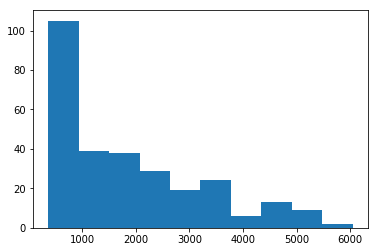

In [30]:
days_old_hist = plt.hist(df['review_age_days'])

In [16]:
# We create the annual HVAR score
df['annual_HVAR'] = df.apply(lambda x: 365*x.helpful_votes/x.review_age_days, axis = 1)

In [33]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime', 'helpful_votes',
       'review_age_days', 'annual_HVAR'],
      dtype='object')

In [38]:
# by_book = df.groupby('asin').agg('annual_HVAR': 'describe'})
by_book = df.groupby('asin').agg({'unixReviewTime':'count','annual_HVAR': 'std'})
by_book

,unixReviewTime,annual_HVAR
asin,,
000616823X,1,NaN
0007256817,1,NaN
0060555831,1,NaN
0060582510,1,NaN
0060763418,1,NaN
0060779683,1,NaN
0060794410,1,NaN
0060796677,1,NaN
0061054437,1,NaN


In [37]:
by_book.columns

MultiIndex(levels=[['annual_HVAR'], ['count', 'min', 'max', 'std']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]])